<a href="https://colab.research.google.com/github/Nico-GP/sales-predictions/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Proyecto 1 
## Creado por: Nicolas Gonzalez
### Descripcion: Limpieza de datos
* Creado: 14/01/22
* Ultima Actualizacion: 14/01/22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CodingDojo/Project1/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Informacion de la trama de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se identifica donde hay valores faltantes

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se cuantifica porcentualmente los datos faltantes

In [ ]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Informacion estadistica de la trama de datos

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Se ingresa la categoria "Unspecified" en las celdas vacias de la comlumna "Outlet_Size"

In [ ]:
df["Outlet_Size"].fillna("Unspecified", inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unspecified,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Trama de datos con valores iguales a 0 de la columna "Item_Visibility"

In [ ]:
missing_IV = df["Item_Visibility"] == 0
df.loc[missing_IV, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Unspecified,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


Se eliminan las filas que contengan "0" en la columna "Item_Visibility"

In [ ]:
df.drop(df.loc[df["Item_Visibility"]==0].index, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


Categorias de la columna "Item_Fat_Content"

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    4789
Regular    2708
LF          285
reg         113
low fat     102
Name: Item_Fat_Content, dtype: int64

Se estandariza las categorias de la columna "Item_Fat_Content"

In [ ]:
df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5176
Regular    2821
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


Se omiten los velores faltantes en la columna "Item_Weight"

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1373
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7997 non-null   object 
 1   Item_Weight                6624 non-null   float64
 2   Item_Fat_Content           7997 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  7997 non-null   object 
 5   Item_MRP                   7997 non-null   float64
 6   Outlet_Identifier          7997 non-null   object 
 7   Outlet_Establishment_Year  7997 non-null   int64  
 8   Outlet_Size                7997 non-null   object 
 9   Outlet_Location_Type       7997 non-null   object 
 10  Outlet_Type                7997 non-null   object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 812.2+ KB


Tipo de producto mas comun

In [ ]:
df["Item_Type"].mode()

0    Fruits and Vegetables
dtype: object

Ventas totales por tipo de producto

In [55]:
v_tipo = df.groupby(["Item_Type"])[["Item_Outlet_Sales"]].sum()
v_tipo

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.193600e+06
Breads,5.088317e+05
Breakfast,2.268148e+05
Canned,1.369648e+06
Dairy,1.438232e+06
Frozen Foods,1.715938e+06
Fruits and Vegetables,2.596449e+06
Hard Drinks,4.216318e+05
Health and Hygiene,9.753384e+05


In [56]:
v_tipo.to_excel(excel_writer='v_tipo.xlsx',index=True)

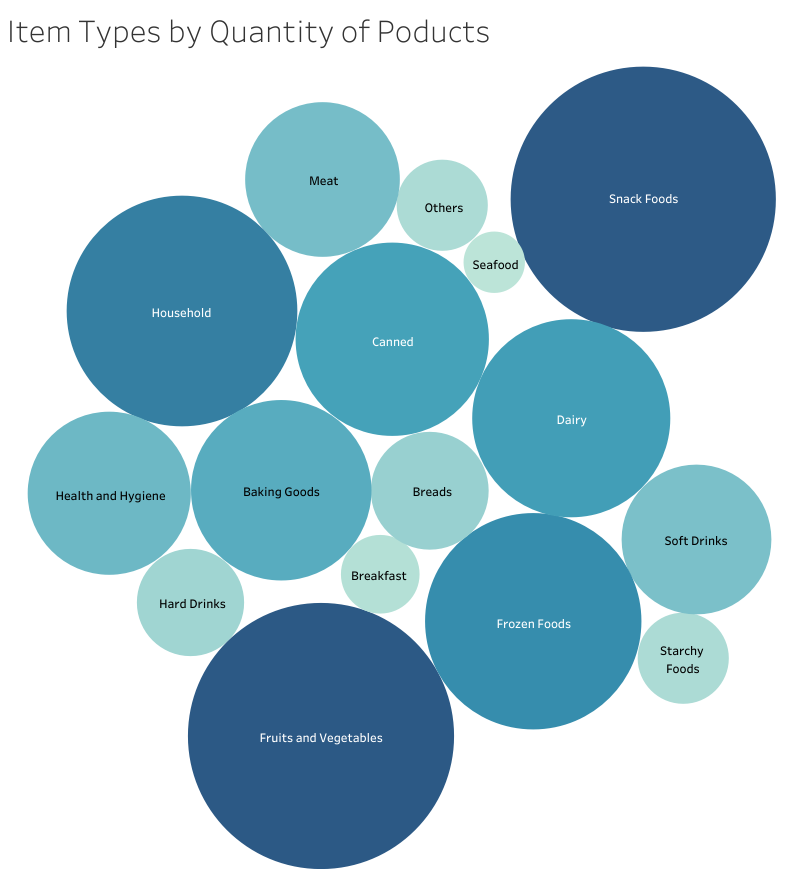

Ventas totales de cada producto

In [ ]:
df.groupby(["Item_Identifier"])[["Item_Outlet_Sales"]].sum()

,Item_Outlet_Sales
Item_Identifier,
DRA12,6239.8776
DRA24,15723.5328
DRA59,18509.2400
DRB01,4554.0720
DRB13,12144.1920
...,...
NCZ30,11689.4506
NCZ41,7259.8832
NCZ42,18487.9344


In [ ]:
import matplotlib.pyplot as plt

Ventas totales de cada tienda

In [ ]:
v_tienda = df.groupby(["Outlet_Identifier"])[["Item_Outlet_Sales"]].sum()
v_tienda

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.770575e+05
OUT013,2.002286e+06
OUT017,2.037795e+06
OUT018,1.720256e+06
OUT019,1.706419e+05
OUT027,3.231976e+06
OUT035,2.140235e+06
OUT045,1.888582e+06
OUT046,1.989434e+06


In [44]:
v_tienda.to_excel(excel_writer='v_tienda.xlsx',index=True)

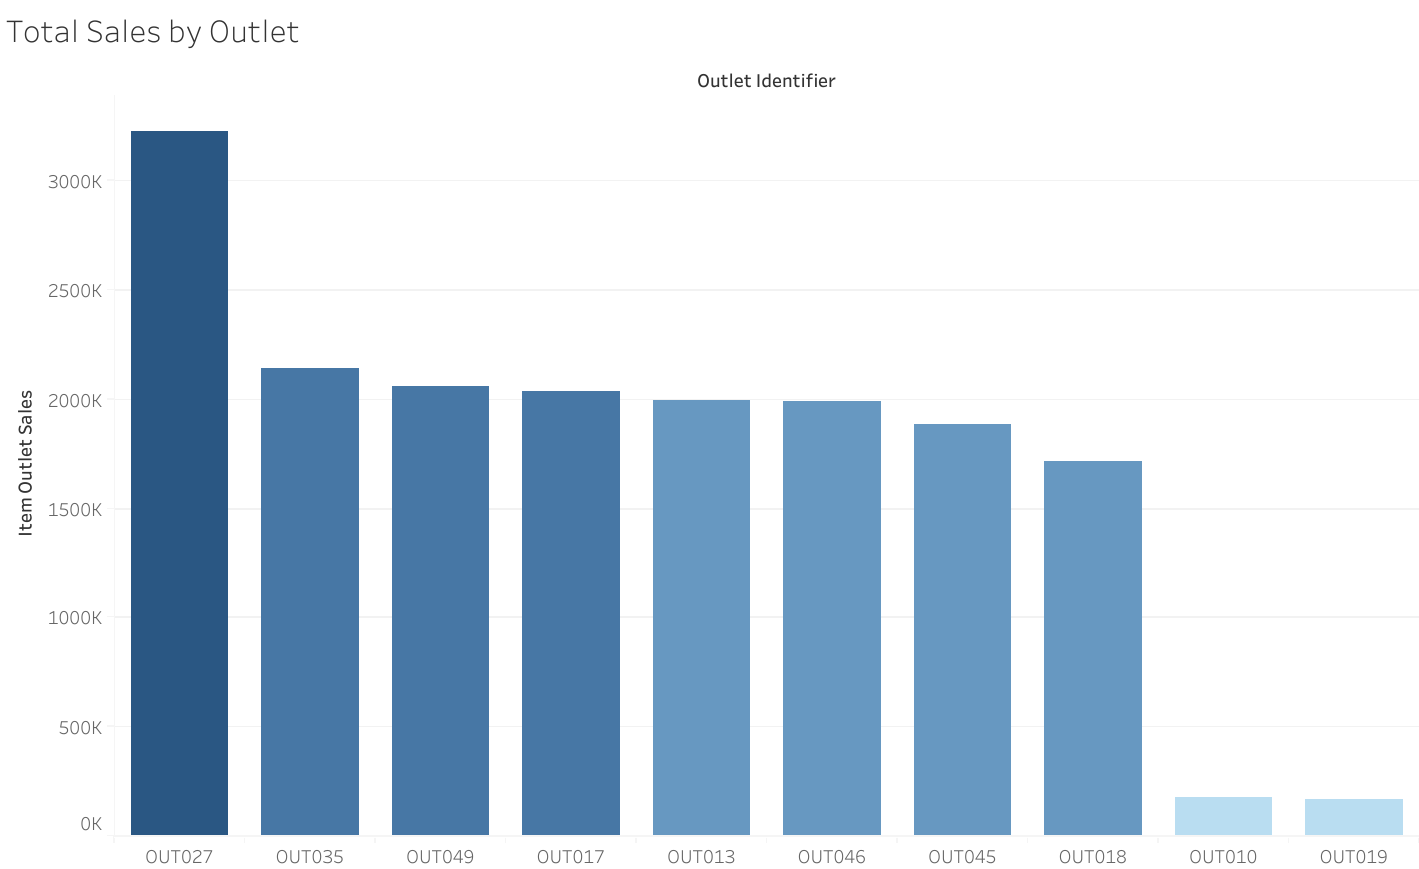

Ventas promedio de cada producto en cada tienda

In [49]:
df.groupby(["Outlet_Identifier", "Item_Identifier"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Outlet_Identifier Item_Identifier                   
OUT010            DRA12                     283.6308
                  DRA24                     327.5736
                  DRA59                     185.0924
                  DRB13                     948.7650
                  DRB25                     214.3876
...                                              ...
OUT049            NCZ18                    5580.7356
                  NCZ30                    2530.7058
                  NCZ42                    4740.4960
                  NCZ53                    3956.8494
                  NCZ54                    7148.0288

[7997 rows x 1 columns]

Ventas promedio por tamaño de tienda

In [47]:
v_tamano_p = df.groupby(["Outlet_Size"])[["Item_Outlet_Sales"]].mean()
v_tamano_p

,Item_Outlet_Sales
Outlet_Size,
High,2293.568889
Medium,2682.996793
Small,1917.214289
Unspecified,1810.871106


In [48]:
v_tamano_p.to_excel(excel_writer='v_tamano_p.xlsx',index=True)

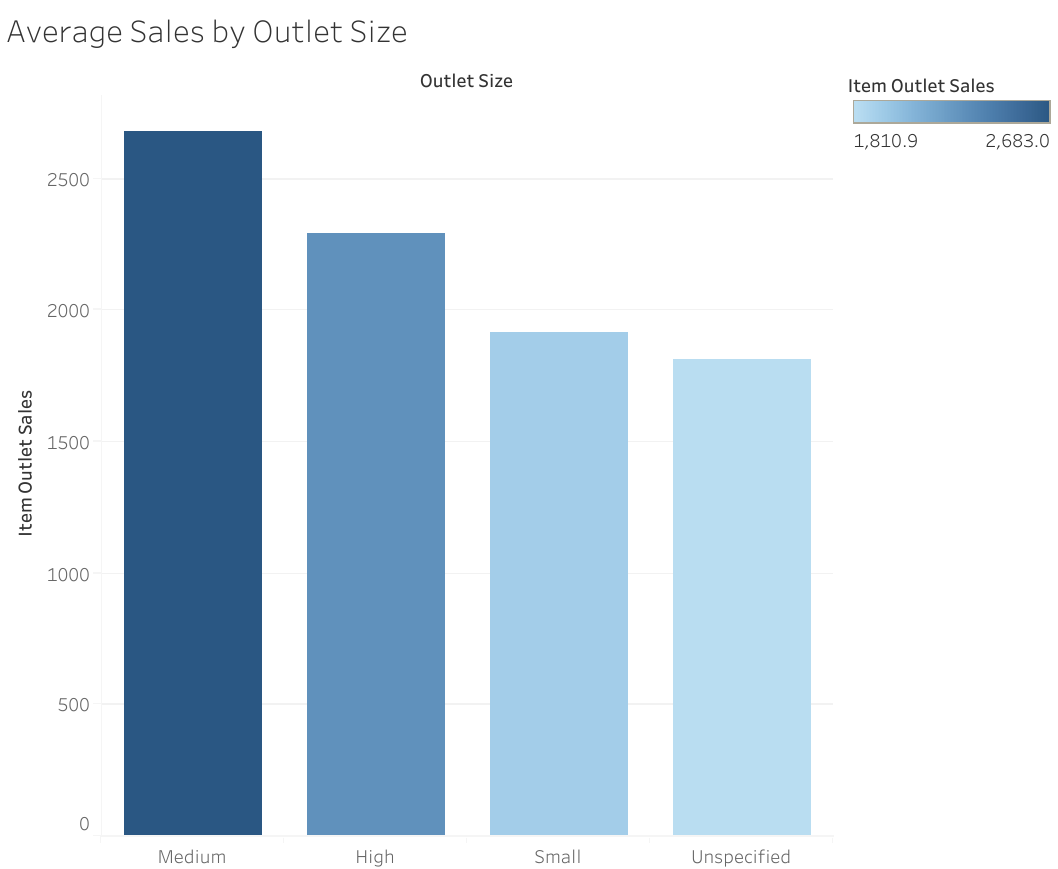

Producto mas vendido en cada tienda

In [ ]:
df.groupby(["Outlet_Identifier", "Item_Identifier"])[["Item_Outlet_Sales"]].max()

Item_Outlet_Sales
Outlet_Identifier Item_Identifier                   
OUT010            DRA12                     283.6308
                  DRA24                     327.5736
                  DRA59                     185.0924
                  DRB13                     948.7650
                  DRB25                     214.3876
...                                              ...
OUT049            NCZ18                    5580.7356
                  NCZ30                    2530.7058
                  NCZ42                    4740.4960
                  NCZ53                    3956.8494
                  NCZ54                    7148.0288

[7997 rows x 1 columns]

Ventas promedio de los productos agrupadas por visibilidad

In [ ]:
df.groupby(["Item_Identifier", "Item_Visibility"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Item_Identifier Item_Visibility                   
DRA12           0.040912                 2552.6772
                0.041113                  850.8924
                0.041178                 2552.6772
                0.068535                  283.6308
DRA24           0.039735                 4913.6040
...                                            ...
NCZ54           0.083359                 4711.2008
                0.083489                 7148.0288
                0.083528                 2274.3728
                0.083699                 2599.2832
                0.145952                  162.4552

[7997 rows x 1 columns]

Ventas agrupadas por año de establecimiento de las tiendas

In [50]:
v_ano = df.groupby(["Outlet_Establishment_Year"])[["Item_Outlet_Sales"]].sum()
v_ano

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3.402618e+06
1987,2.002286e+06
1997,1.989434e+06
1998,1.770575e+05
1999,2.063804e+06
2002,1.888582e+06
2004,2.140235e+06
2007,2.037795e+06
2009,1.720256e+06


In [51]:
v_ano.to_excel(excel_writer='v_ano.xlsx',index=True)

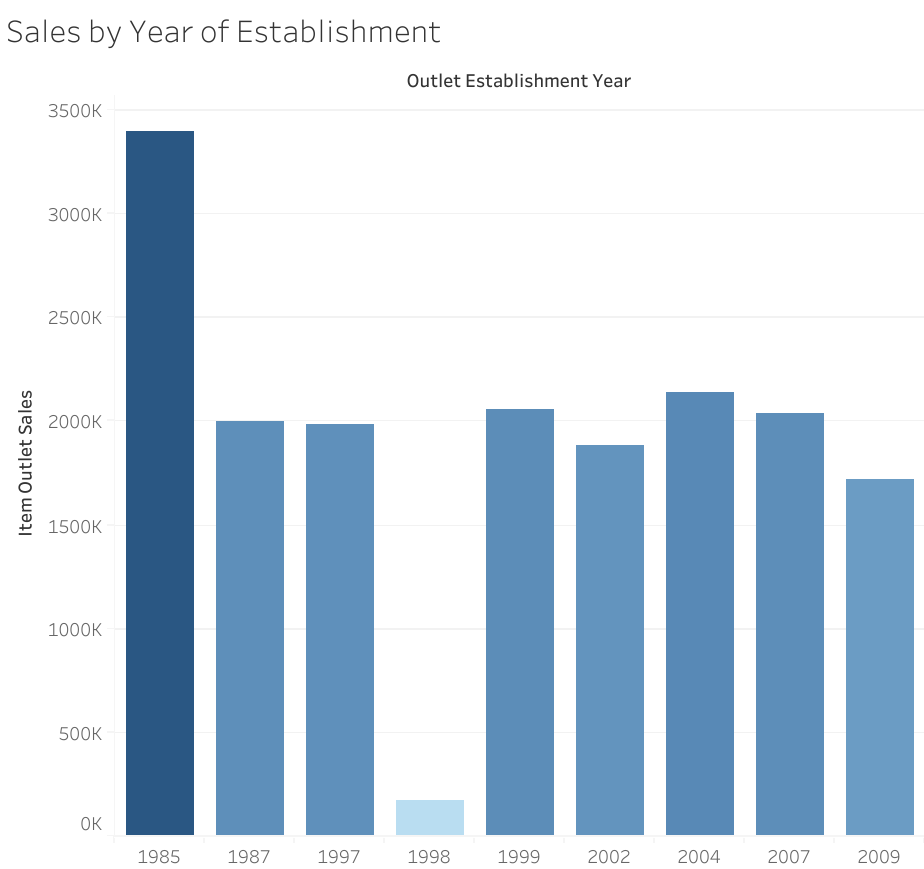

Ventas totales agrupadas por precio de cada producto

In [ ]:
df.groupby(["Item_Identifier", "Item_MRP"])[["Item_Outlet_Sales"]].sum()

Item_Outlet_Sales
Item_Identifier Item_MRP                   
DRA12           140.3154          2552.6772
                142.0154           850.8924
                142.3154          2552.6772
                143.0154           283.6308
DRA24           162.4868          4422.2436
...                                     ...
NCZ54           161.3552          7148.0288
                161.9552          4711.2008
                162.4552          2274.3728
                163.4552          2599.2832
                164.0552          5523.4768

[7550 rows x 1 columns]

Ventas totales por contenido de grasa

In [59]:
v_grasa = df.groupby(["Item_Fat_Content"])[["Item_Outlet_Sales"]].sum()
v_grasa

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,1.116025e+07
Regular,6.261817e+06


In [62]:
v_grasa.to_excel(excel_writer='v_grasa.xlsx',index=True)

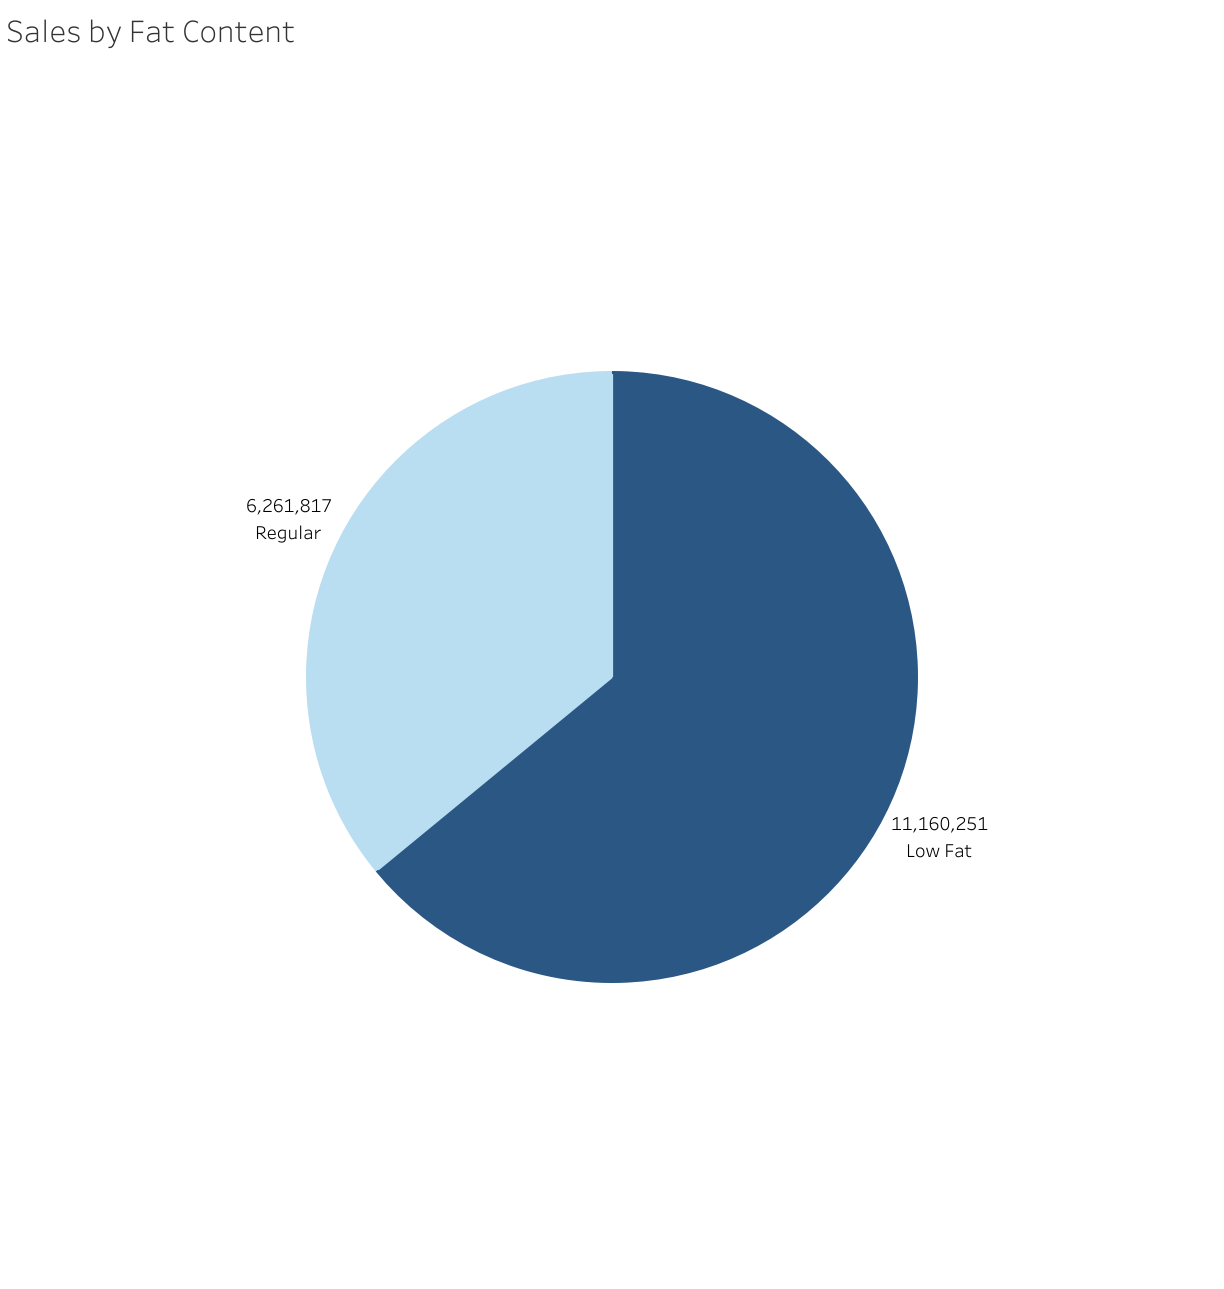